In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from Eva import eva_best_partition, modularity, purity
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [2]:
#G.clear()
edgedata = pd.read_csv('C:/Users/Jakob/Desktop/CogSci/Bachelor thesis/EC_Reddit_CaseStudy-main/data/guncontrol/guncontrol_2017-01-01_2017-07-01_edgelist.csv')
nodedata = pd.read_csv('C:/Users/Jakob/Desktop/CogSci/Bachelor thesis/EC_Reddit_CaseStudy-main/data/guncontrol/guncontrol_2017-01-01_2017-07-01_nodelist.csv')
#testsets
#edgedata = pd.read_csv('/content/drive/MyDrive/google_colab_bachelor/EC_Reddit_CaseStudy-main/data/edgelist_test.csv')
#nodedata = pd.read_csv('/content/drive/MyDrive/google_colab_bachelor/EC_Reddit_CaseStudy-main/data/nodelist_test.csv')

###changing format from dataframe to dictionary
nodedata = nodedata.set_index('id').T.to_dict('dict')
###nodes = {0: {'name': 'Foo', "gender": "M"}, 1: {"name": "Bar", "gender": "F"}, 2: {"name": "Baz", "gender": "M"}} ###dict format
print(nodedata)
print(type(nodedata))
print(edgedata)

{3396: {'mean_score': 0.8517901649999999, 'leaning': 'protrump'}, 3397: {'mean_score': 0.97901756, 'leaning': 'protrump'}, 3398: {'mean_score': 0.9953908, 'leaning': 'protrump'}, 3399: {'mean_score': 0.94533575, 'leaning': 'protrump'}, 3400: {'mean_score': 0.666928059, 'leaning': 'protrump'}, 3401: {'mean_score': 0.5437324017142857, 'leaning': 'protrump'}, 3402: {'mean_score': 0.97130805, 'leaning': 'protrump'}, 3403: {'mean_score': 0.4907372275000001, 'leaning': 'antitrump'}, 3404: {'mean_score': 0.989684, 'leaning': 'protrump'}, 3405: {'mean_score': 0.9923504, 'leaning': 'protrump'}, 3406: {'mean_score': 0.9853717433333332, 'leaning': 'protrump'}, 3407: {'mean_score': 0.9961706, 'leaning': 'protrump'}, 3408: {'mean_score': 0.041736476, 'leaning': 'antitrump'}, 3409: {'mean_score': 0.9455165285714284, 'leaning': 'protrump'}, 3410: {'mean_score': 0.9746285, 'leaning': 'protrump'}, 3411: {'mean_score': 0.3274598246666667, 'leaning': 'antitrump'}, 19: {'mean_score': 0.791209718, 'leaning

In [67]:
#####ACTUAL GRAPH CREATION
#G.clear()
G = nx.from_pandas_edgelist(edgedata, 'from_id', 'to_id', 'weight')


# G = nx.path_graph(3) #Creatin the graph object with three nodes. i think we already create links here mby? thats a problem
nx.set_node_attributes(G, nodedata)
list(G.nodes)
G.nodes

NodeView((3396, 3412, 3397, 3974, 3729, 3833, 1453, 2192, 3398, 4061, 3578, 2823, 3559, 3399, 2797, 3400, 4110, 3238, 3403, 1658, 3982, 3563, 1232, 3868, 3565, 1344, 3717, 3979, 4050, 838, 1858, 3401, 3734, 156, 3636, 3822, 3672, 3449, 3670, 3738, 1542, 3404, 3690, 3407, 4096, 4172, 3408, 3537, 3409, 3739, 3566, 3569, 3691, 3902, 3512, 2902, 3411, 3953, 19, 3684, 3644, 241, 3795, 4163, 4218, 4069, 3524, 2287, 184, 1240, 3755, 4035, 3642, 3564, 4080, 3495, 3627, 4215, 4045, 3662, 3911, 3658, 4159, 3987, 4120, 4179, 971, 3461, 3877, 479, 3874, 87, 3592, 4033, 4168, 3474, 4201, 1550, 3754, 3855, 3457, 3414, 3441, 482, 3983, 3807, 3499, 25, 617, 3601, 440, 384, 2073, 80, 418, 3506, 3245, 1804, 3834, 3473, 1055, 818, 3969, 2638, 3907, 3905, 2575, 3820, 4091, 432, 2585, 2648, 3633, 3815, 4197, 1775, 1120, 1105, 3378, 3975, 3418, 3950, 4166, 3477, 3419, 3926, 3659, 2615, 3538, 2918, 3744, 4223, 1200, 3883, 3503, 3878, 4154, 4018, 3547, 3475, 3548, 3925, 3555, 2361, 4068, 4125, 1941, 4196, 374

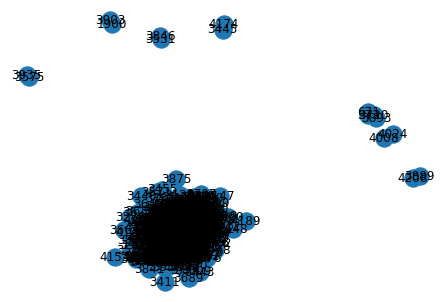

False

In [5]:
nx.draw(G, with_labels=True)
plt.show()

G.number_of_nodes()
list(G.nodes)
G.has_node(0)

In [29]:
##Louvain particioning

# compute the best partition
partition = community_louvain.best_partition(G)
partition


{3396: 0,
 3412: 0,
 3397: 0,
 3974: 0,
 3729: 1,
 3833: 2,
 1453: 3,
 2192: 0,
 3398: 2,
 4061: 2,
 3578: 2,
 2823: 2,
 3559: 2,
 3399: 0,
 2797: 0,
 3400: 3,
 4110: 3,
 3238: 3,
 3403: 0,
 1658: 2,
 3982: 3,
 3563: 3,
 1232: 3,
 3868: 3,
 3565: 3,
 1344: 3,
 3717: 3,
 3979: 3,
 4050: 3,
 838: 3,
 1858: 3,
 3401: 6,
 3734: 5,
 156: 6,
 3636: 6,
 3822: 6,
 3672: 6,
 3449: 3,
 3670: 2,
 3738: 0,
 1542: 0,
 3404: 6,
 3690: 6,
 3407: 6,
 4096: 6,
 4172: 6,
 3408: 6,
 3537: 6,
 3409: 0,
 3739: 0,
 3566: 0,
 3569: 0,
 3691: 0,
 3902: 0,
 3512: 5,
 2902: 6,
 3411: 6,
 3953: 6,
 19: 0,
 3684: 0,
 3644: 0,
 241: 3,
 3795: 0,
 4163: 2,
 4218: 0,
 4069: 0,
 3524: 3,
 2287: 0,
 184: 0,
 1240: 0,
 3755: 0,
 4035: 0,
 3642: 0,
 3564: 3,
 4080: 2,
 3495: 0,
 3627: 0,
 4215: 2,
 4045: 0,
 3662: 1,
 3911: 0,
 3658: 0,
 4159: 0,
 3987: 0,
 4120: 0,
 4179: 0,
 971: 2,
 3461: 0,
 3877: 0,
 479: 3,
 3874: 0,
 87: 6,
 3592: 0,
 4033: 0,
 4168: 0,
 3474: 0,
 4201: 2,
 1550: 3,
 3754: 0,
 3855: 3,
 3457: 2,


In [41]:
def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
          
    return list

keys = getList(partition)

In [50]:
def getList2(dict):
    list = []
    for value in dict.values():
        list.append(value)
          
    return list

values = getList2(partition)

In [70]:
a = {'user': keys , 'community' : values}

df_com = pd.DataFrame(data = a)
df_com.to_csv('partitions.csv', index=False)
    

In [8]:
pos = nx.spring_layout(G)
pos

{3396: array([-0.08391505,  0.06596433]),
 3412: array([-0.04232289,  0.00318795]),
 3397: array([0.00939895, 0.01291496]),
 3974: array([0.05433654, 0.1276986 ]),
 3729: array([-0.01335776, -0.03147347]),
 3833: array([ 0.03815908, -0.03731649]),
 1453: array([ 0.01509604, -0.00743562]),
 2192: array([-0.0041405, -0.0113998]),
 3398: array([ 0.06051153, -0.07270443]),
 4061: array([ 0.05995534, -0.05112957]),
 3578: array([ 0.04408374, -0.05300742]),
 2823: array([ 0.03389714, -0.04074638]),
 3559: array([ 0.0319819 , -0.04916935]),
 3399: array([-0.01802881, -0.08722966]),
 2797: array([-0.02341356, -0.02118756]),
 3400: array([ 0.0497425 , -0.00150336]),
 4110: array([ 0.11482323, -0.0055813 ]),
 3238: array([ 0.01824412, -0.00230646]),
 3403: array([ 0.016099  , -0.01196284]),
 1658: array([ 0.01879795, -0.04350907]),
 3982: array([0.11152479, 0.02289184]),
 3563: array([0.04497423, 0.00868499]),
 1232: array([ 0.04121239, -0.01208065]),
 3868: array([ 0.04751544, -0.03171164]),
 3

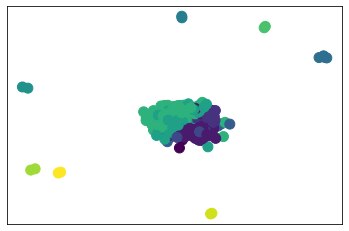

In [13]:
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=1)
plt.show()



In [14]:
nx.modularity_matrix(G)

matrix([[-4.94559842e-04,  9.96785361e-01, -1.48367953e-03, ...,
         -2.47279921e-04, -2.47279921e-04, -2.47279921e-04],
        [ 9.96785361e-01, -2.08951533e-02, -9.64391691e-03, ...,
         -1.60731949e-03, -1.60731949e-03, -1.60731949e-03],
        [-1.48367953e-03, -9.64391691e-03, -4.45103858e-03, ...,
         -7.41839763e-04, -7.41839763e-04, -7.41839763e-04],
        ...,
        [-2.47279921e-04, -1.60731949e-03, -7.41839763e-04, ...,
         -1.23639960e-04, -1.23639960e-04, -1.23639960e-04],
        [-2.47279921e-04, -1.60731949e-03, -7.41839763e-04, ...,
         -1.23639960e-04, -1.23639960e-04, -1.23639960e-04],
        [-2.47279921e-04, -1.60731949e-03, -7.41839763e-04, ...,
         -1.23639960e-04, -1.23639960e-04, -1.23639960e-04]])